# Imports

In [14]:
import numpy as np
from torchsummary import summary
import torch
import matplotlib.pyplot as plt

# Load model

In [7]:
model_path = './models/'
model = torch.load(model_path + 'ShallowFBCSPNet_XDAWN')

In [9]:
model.eval()

Sequential(
  (dimshuffle): Expression(expression=_transpose_time_to_spat)
  (conv_time): Conv2d(1, 40, kernel_size=(25, 1), stride=(1, 1))
  (conv_spat): Conv2d(40, 40, kernel_size=(1, 19), stride=(1, 1), bias=False)
  (bnorm): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_nonlin): Expression(expression=square)
  (pool): AvgPool2d(kernel_size=(75, 1), stride=(15, 1), padding=0)
  (pool_nonlin): Expression(expression=safe_log)
  (drop): Dropout(p=0.5, inplace=False)
  (conv_classifier): Conv2d(40, 2, kernel_size=(14, 1), stride=(1, 1))
  (softmax): LogSoftmax()
  (squeeze): Expression(expression=_squeeze_final_output)
)

In [11]:
w = list(model.parameters())

In [18]:
tensor_time = np.array(w[1].data.cpu())

In [24]:
tensor_time.shape

(40,)

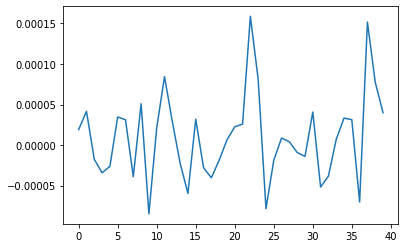

In [19]:
plt.plot(tensor_time)

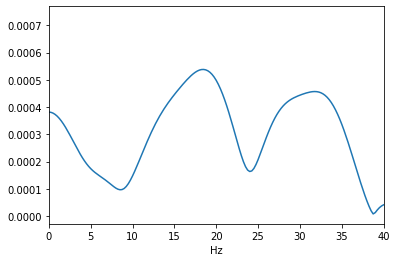

In [21]:
import scipy.signal as ss
b = tensor_time
f, h0= ss.freqz(b, a=1, worN=512, whole=False,  fs=256)


plt.figure()
plt.plot(f, abs(h0))
plt.xlabel('Hz')
plt.xlim((0,40))
plt.show()

In [22]:
tensor_spat = np.array(w[2].data.cpu())

In [26]:
tensor_spat = tensor_spat.reshape([40,40,19])

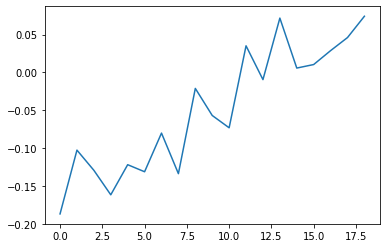

In [27]:
plt.plot(tensor_spat[0,0,:])